In [3]:
import numpy as np
import pandas as pd
import missingno as msg
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'missingno'

In [ ]:
df=pd.read_csv('/content/Car details v3.csv')

In [ ]:
df.shape

(8128, 13)

In [ ]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
df.select_dtypes('object').nunique()

name            2058
fuel               4
seller_type        3
transmission       2
owner              5
mileage          393
engine           121
max_power        322
torque           441
dtype: int64

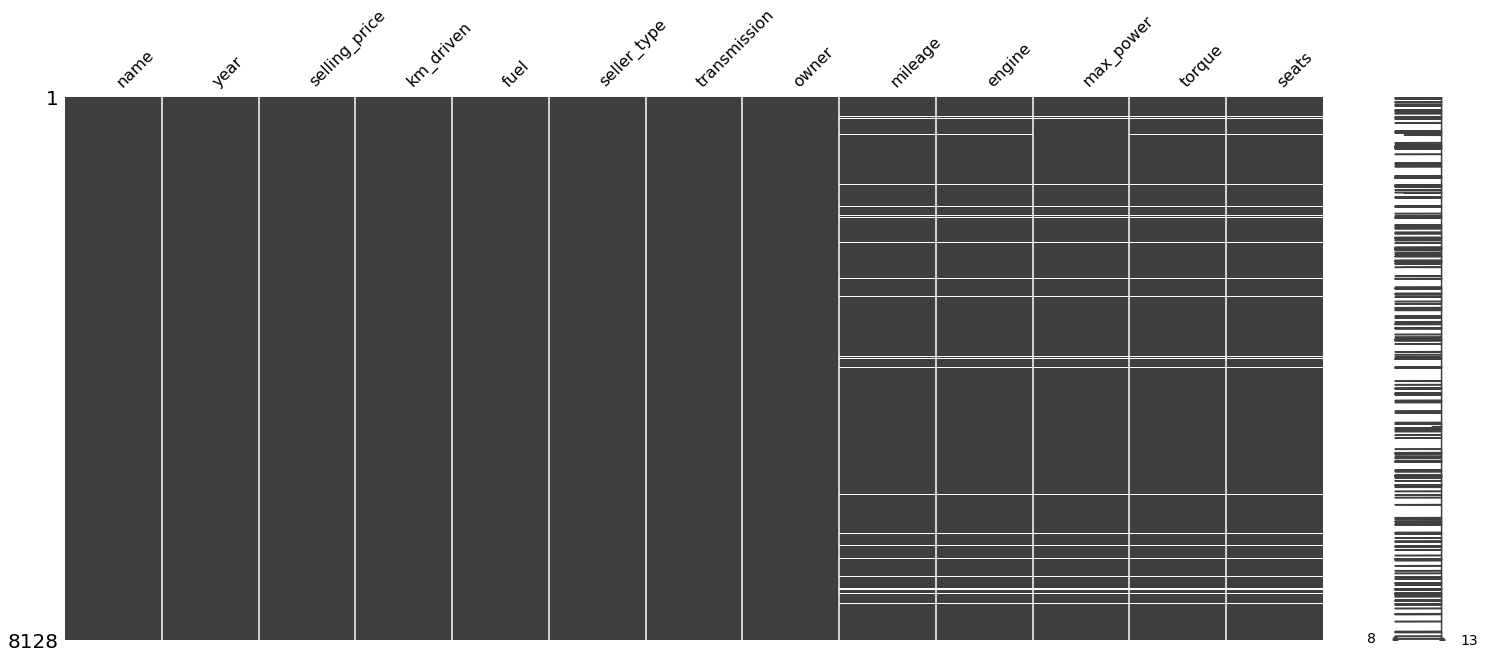

In [ ]:
msg.matrix(df)

  **MILEAGE**

In [ ]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

The number of rows with Km/Kg : 88 
The number of rows with Km/Kg : 7819 


In [ ]:
df['mileage']=Correct_Mileage

In [ ]:
df['mileage'].astype(float).unique()

array([23.4  , 21.14 , 17.7  , 23.   , 16.1  , 20.14 , 24.22 , 23.59 ,
       20.   , 19.01 , 17.3  , 19.3  ,    nan, 18.9  , 18.15 , 24.52 ,
       19.7  , 22.54 , 21.   , 25.5  , 26.59 , 21.5  , 20.3  , 21.4  ,
       24.7  , 18.2  , 16.8  , 24.3  , 14.   , 18.6  , 46.816, 23.95 ,
       17.   , 20.63 , 13.93 , 16.   , 17.8  , 18.5  , 12.55 , 12.99 ,
       14.8  , 13.5  , 26.   , 20.65 , 27.3  , 11.36 , 17.68 , 14.28 ,
       18.53 , 14.84 , 21.12 , 20.36 , 21.27 , 18.16 , 22.   , 25.1  ,
       20.51 , 21.66 , 25.2  , 22.9  , 16.02 , 20.54 , 22.77 , 15.71 ,
       23.1  , 19.02 , 19.81 , 36.68 , 16.47 , 15.04 , 19.1  , 21.79 ,
       18.8  , 21.21 , 15.37 , 11.79 , 19.   , 14.3  , 15.8  , 15.1  ,
       19.09 , 22.32 , 21.9  , 14.53 , 21.63 , 20.85 , 20.45 , 19.67 ,
       23.01 , 20.77 , 17.92 , 17.01 , 22.37 , 19.33 ,  9.5  , 12.83 ,
       22.48 , 16.78 , 14.67 , 15.   , 13.96 , 18.   , 12.07 , 26.21 ,
       10.8  , 16.3  , 13.6  , 14.74 , 15.6  , 19.56 , 22.69 , 19.16 ,
      

In [ ]:
mean_value=df['mileage'].mean()
df['mileage'].fillna(value=mean_value, inplace=True)

In [ ]:
df['mileage'].isnull().sum()

0

**ENGINE**

In [ ]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [1]:
df['engine'].unique().value_count()

NameError: name 'df' is not defined

In [ ]:
df['engine']=Correct_Engine

In [ ]:
df['engine'].astype(float).unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [ ]:
mean_value2=df['engine'].mean()
df['engine'].fillna(value=mean_value2, inplace=True)

In [ ]:
df['engine'].isnull().sum()

0

**MAX POWER**

In [ ]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

The number of rows with bhp : 7907 


In [ ]:
df['max_power']=Correct_power

**Converting string into float in max_power column**

In [ ]:
#df['max_power']= df['max_power'].astype(float)

In [ ]:
df['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [ ]:
mean_value3=df['seats'].mean()
df['seats'].fillna(value=mean_value3, inplace=True)

In [ ]:
df['seats'].isnull().sum()

0

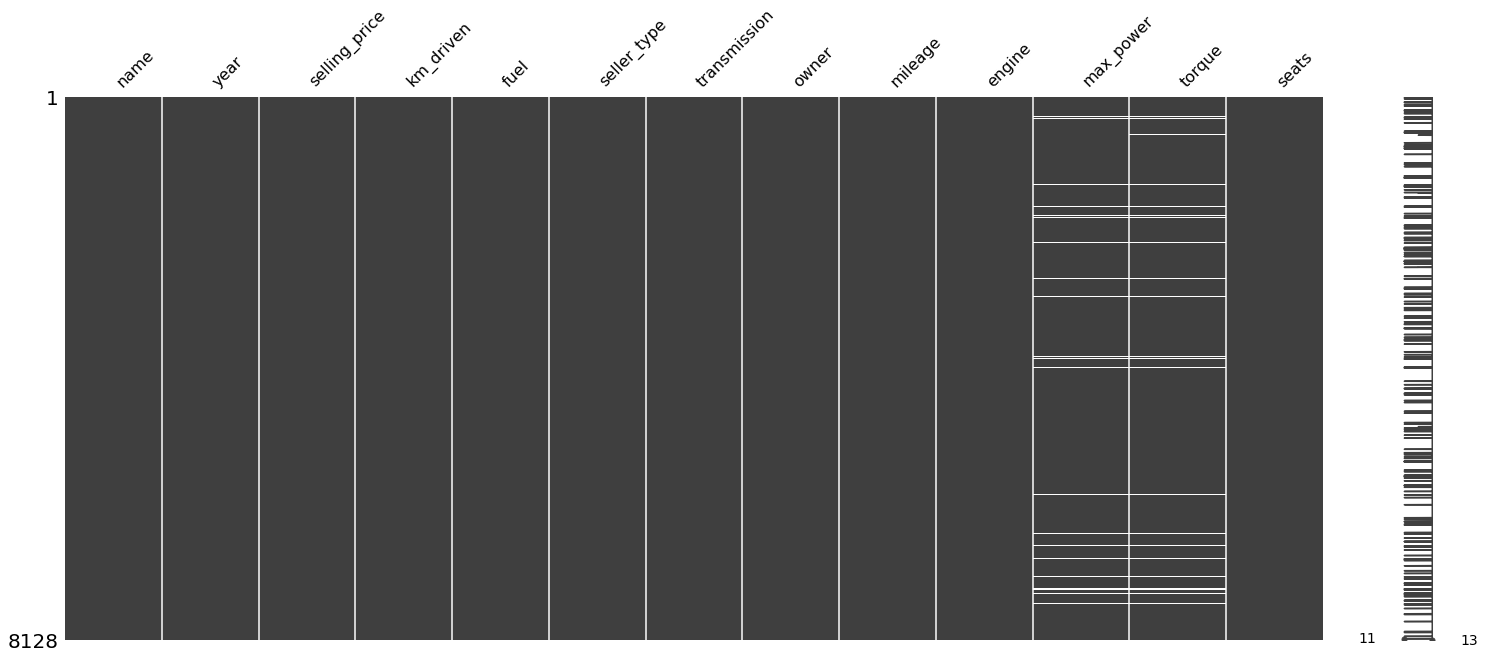

In [ ]:
msg.matrix(df)

**Training Model**

In [ ]:
data= pd.get_dummies(df, columns = ['fuel', 'seller_type','transmission','owner'])

In [ ]:
data.head(10)

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74,190Nm@ 2000rpm,5.0,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,0,...,0,1,0,0,1,1,0,0,0,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,0,...,0,1,0,0,1,1,0,0,0,0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,24.22,1061.0,57.5,"7.8@ 4,500(kgm@ rpm)",5.0,0,...,0,1,0,0,1,1,0,0,0,0
7,Maruti 800 DX BSII,2001,45000,5000,16.10,796.0,37,59Nm@ 2500rpm,4.0,0,...,0,1,0,0,1,0,0,1,0,0
8,Toyota Etios VXD,2011,350000,90000,23.59,1364.0,67.1,170Nm@ 1800-2400rpm,5.0,0,...,0,1,0,0,1,1,0,0,0,0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,20.00,1399.0,68.1,160Nm@ 2000rpm,5.0,0,...,0,1,0,0,1,1,0,0,0,0


In [ ]:
cols = [col for col in data.columns if col not in ['selling_price','torque','name','max_power']]
x= data[cols]
y=data['selling_price']

LinearRegression()

0.5854944017743806